# 2.1 Tests para muestras independientes (R)

_Este cuaderno se basa en el guion en HTML. El texto ha sido limpiado y **no incluye salidas de ejemplo**; sólo explicaciones en español. Se han añadido subsubsecciones explícitas._

## Índice

- 2.1 Tests para muestras
independientes

In [9]:

# --- Preámbulo del cuaderno (R) ---
# Carga de funciones auxiliares
helper_paths <- c("IntrodEstadFunciones.R", "/mnt/data/IntrodEstadFunciones.R")
found <- helper_paths[file.exists(helper_paths)]
if (length(found) > 0) {
  source(found[1], encoding = "UTF-8")
  message("Funciones cargadas desde: ", found[1])
} else {
  message("Aviso: no se encontró 'IntrodEstadFunciones.R'. Colóquelo junto al notebook o ajuste la ruta.")
}

# Paquetes usados a lo largo del cuaderno
auto_install <- TRUE
req <- c("ggplot2","ggpubr","ggsci","dplyr","readr","rstatix","PMCMRplus","car", "rstatix")
if (auto_install) {
  to_install <- setdiff(req, rownames(installed.packages()))
  if (length(to_install)) install.packages(to_install)
}
suppressPackageStartupMessages({
  for (p in intersect(req, rownames(installed.packages()))) library(p, character.only = TRUE)
})
options(stringsAsFactors = FALSE)


Funciones cargadas desde: IntrodEstadFunciones.R



Installing packages into ‘/home/alexpar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘gmp’, ‘Rmpfr’, ‘pbkrtest’, ‘lme4’




## 2.1 Tests para muestras independientes

Vamos a cargar el dataset y establecemos los nombres de las variables con las que vamos a trabajar. También convertimos a factor la columna de la variable de agrupación ya que algunos tests como así lo requieren. Lo hacemos con la función :

In [10]:
load("DatosEmpleados.RData")
datos = DatosEmpleados
v.depend = "salario"
v.factor.2.valores = "sexo"
indice.col.factor.2valores = which(colnames(datos) == v.factor.2.valores)
datos[,indice.col.factor.2valores] = as.factor(as.data.frame(datos)[,indice.col.factor.2valores])

In [11]:
head(datos)

,Id,sexo,fechnac,educ,catlab,salario,salini,tiempemp,expprev,minoría
,<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>
1,1,Hombre,2/3/1952,15,Directivo,57000,27000,98,144,No
2,2,Hombre,5/23/1958,16,Administrativo,40200,18750,98,36,No
3,3,Mujer,7/26/1929,12,Administrativo,21450,12000,98,381,No
4,4,Mujer,4/15/1947,8,Administrativo,21900,13200,98,190,No
5,5,Hombre,2/9/1955,15,Administrativo,45000,21000,98,138,No
6,6,Hombre,8/22/1958,15,Administrativo,32100,13500,98,67,No


Algunos tests usan fórmulas para especificar la variable dependiente y la de agrupación. Por ejemplo, si queremos realizar un Anova del salario sobre el sexo, usaríamos la fórmula siguiente:

In [12]:
salario ~ sexo

salario ~ sexo

Para no tener que repetir dicha expresión, la guardamos en una variable aplicando la función :

In [13]:
formula.t.test = as.formula(paste0(v.depend, "~", v.factor.2.valores))  # 2 muestras independientes

In [14]:
formula.t.test

salario ~ sexo

### 2.1.1 Prueba para dos muestras independientes (test paramétrico)

Trabajamos sobre con las variables ( ) y ( ). En primer lugar, construimos un gráfico con los diagramas de cajas:

El gráfico nos muestra que hay mucha menos varianza en el grupo de las mujeres que en el de hombres. Para confirmarlo podemos llamar a la función . El test de Levene sale, claramente, significativo, por lo que rechazamos que las varianzas sean iguales:

Como las varianzas son distintas, lanzamos el test de Welch llamando a la correspondiente función de y mostramos el resultado con la función . contiene información sobre el valor de estadístico del test, los grados de libertad, el p-value, etc. Para mostrar este último, basta acceder al valor :

O directamente lo vemos en la gráfica correspondiente (en vez de mostrar el valor exacto, simplemente nos dice que es menor que 0.0001):

Aunque el test de Welch es robusto a la desviaciones de la normalidad de los residuos, debemos analizarlos para tener una garantía estadística. Para extraer los residuos de un test realizado con , debemos utilizar la función que veremos posteriormente (es la generalización de la función cuando hay más de dos grupos)

Definimos nuestra propia función para realizar dicha tarea:

Para ver si siguen una distribución normal, podemos lanzar el test de Shapiro aunque normalmente es suficiente con que el gráfico QQ no muestre una desviación acusada (usamos las funciones y )

Podemos apreciar (ya lo habíamos visto con Jamovi) que no se cumple la hipótesis de normalidad de los residuos, por lo que optamos por aplicar un test no paramétrico. Lo hacemos a continuación.

Installing package into ‘/home/alexpar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



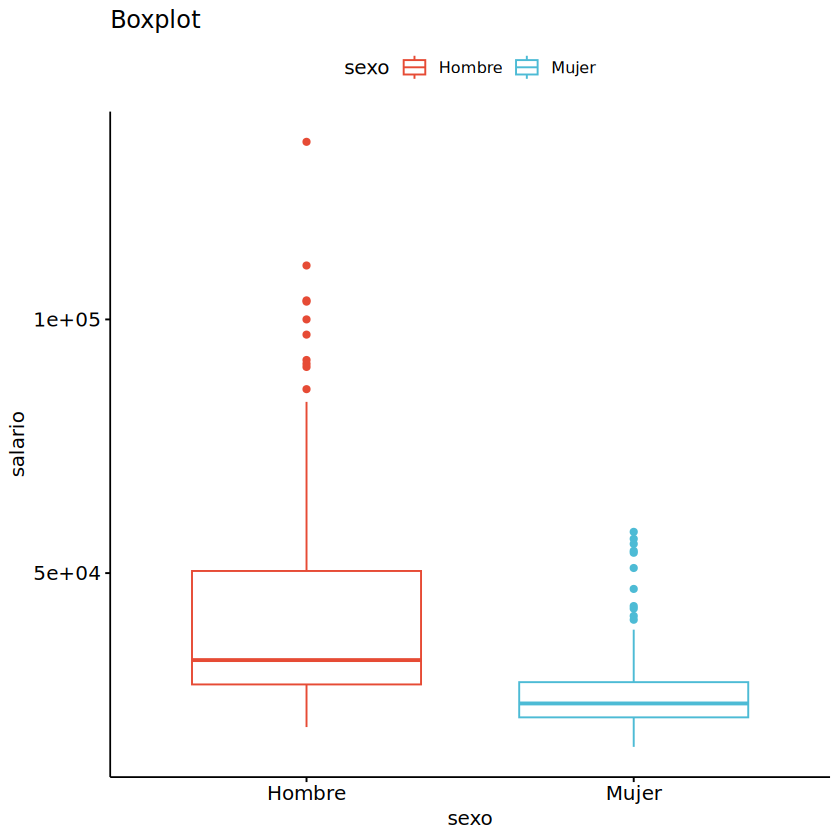

In [15]:
install.packages("ggpubr")

GraficoCajas(datos, v.depend, v.factor.2.valores, "Boxplot")

In [16]:
test_homoc_levene = levene_test(formula.t.test, data = datos)
test_homoc_levene

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,472,51.60252,2.665614e-12


In [17]:
test_welch = welch_anova_test(formula = formula.t.test, data = datos)

In [18]:
test_welch$p

[1] 8.3e-27

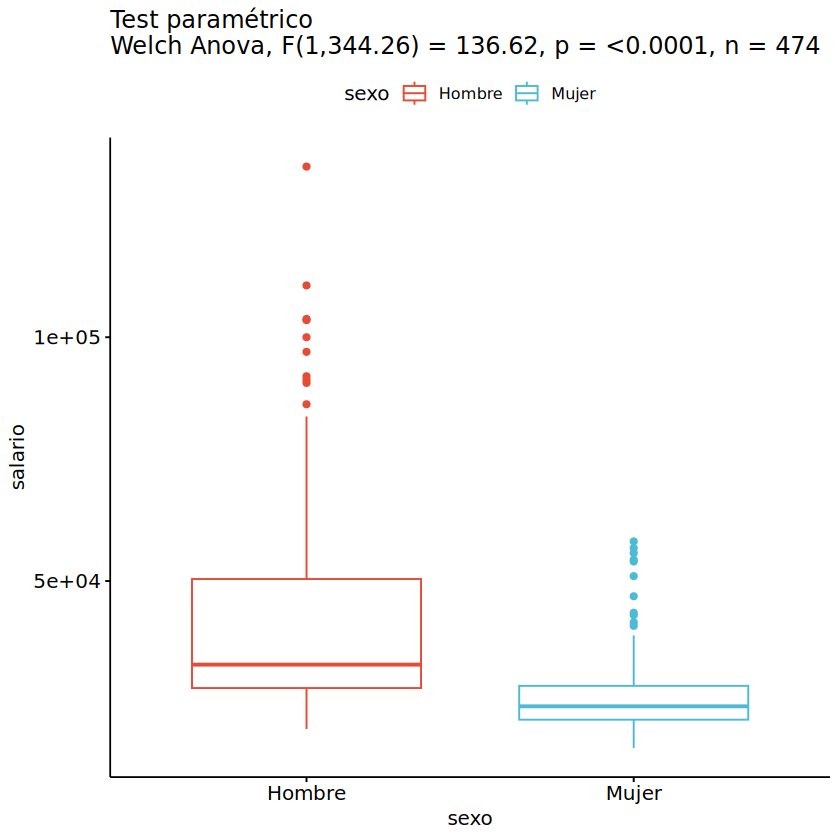

In [19]:
GraficoCajasTest(datos, v.depend, v.factor.2.valores,
                 es_param = TRUE, es_mr = FALSE, test_welch)

In [20]:
Residuos = function (data, var.depend, var.factor){
  formula.anova = as.formula(paste0(var.depend, "~", var.factor))  # k>2 muestras independientes
  test_anova = anova_test(formula = formula.anova, data = data)
  modelo_test = attr(test_anova, "args")$model
  residuals(modelo_test)
}

In [21]:
test_anova_2muestras = anova_test(formula.t.test, data = datos)
residuos_test_anova_2muestras = Residuos(datos, v.depend, v.factor.2.valores)


	Shapiro-Wilk normality test

data:  residuos_test_anova_2muestras
W = 0.83621, p-value < 2.2e-16


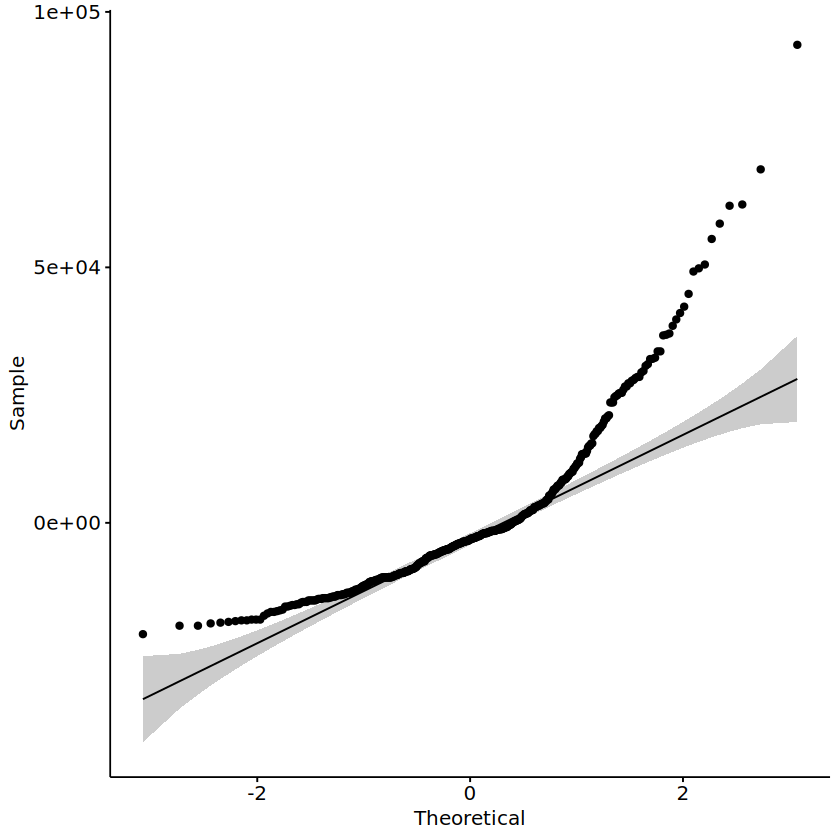

In [22]:
test_normalidad_residuos = shapiro.test(x = residuos_test_anova_2muestras)
test_normalidad_residuos
ggqqplot(residuos_test_anova_2muestras)

### 2.1.2 Test no paramétrico para comparar dos muestras independientes

Para aplicar el test de Mann-Whitney llamamos a la función de y construimos la gráfica llamando a la función :

**Nota**: El valor del estadístico W obtenido por la función (46111.5) es el mayor entre U₁ y U₂ (consultar transparencias del curso) mientras que Jamovi muestra el mínimo (9617)

Recordemos que el test de Mann-Whitney es un test de dominancia estocástica. Si los grupos presentan distribuciones similares, también será un test sobre las medianas, pero ya habíamos visto que las varianzas del salario eran distintas en el grupo de hombres y en el grupo de mujeres, por lo que las distribuciones no son similares.

Por tanto, no podemos afirmar que sea un test sobre las medianas y concluimos que el salario de los hombres es una variable tal que si elegimos al azar un hombre y una mujer es más probable que el salario del primero sea mayor que el de la mujer.

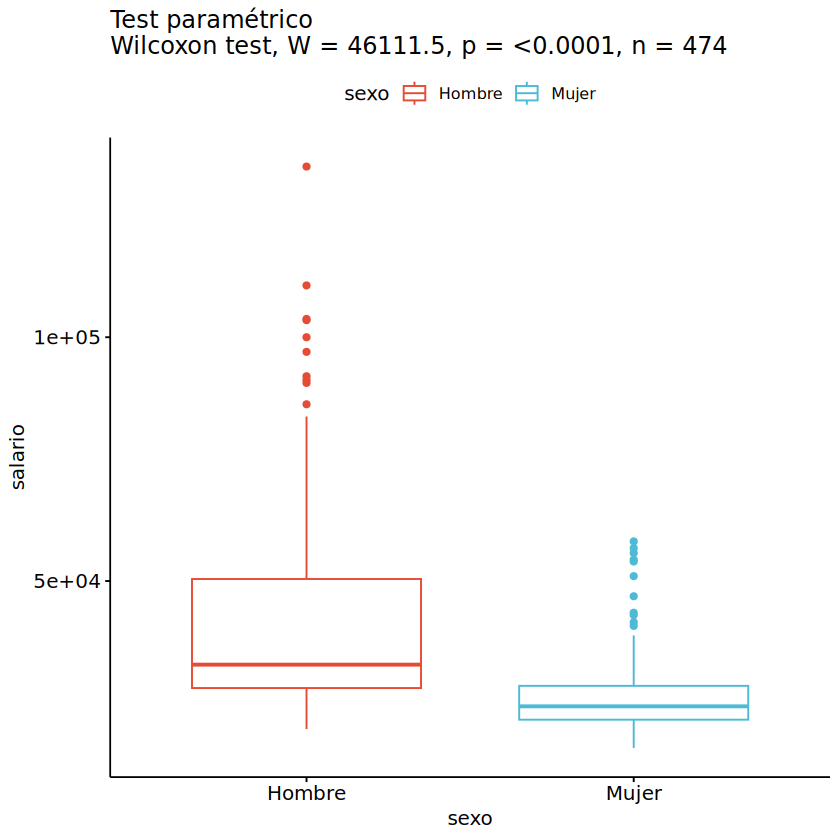

In [23]:
test_mann_whitney = rstatix::wilcox_test(data = datos, formula = salario ~ sexo)
GraficoCajasTest(datos, v.depend, v.factor.2.valores,
                 es_param = TRUE, es_mr = FALSE, test_mann_whitney)

### 2.1.3 Anova para k muestras independientes (test paramétrico)

#### 2.1.3.1 Test conjunto (omnibus)

Trabajamos sobre con las variables y . En primer lugar, establecemos los nombres de las variables y de la fórmula:

Para comprobar la normalidad de los residuos, llamamos a la función que habíamos definido previamente:

Construimos un gráfico con los diagramas de cajas y aplicamos el test de Levene:

El test de Levene confirma lo que vemos en el diagrama de cajas y es que las varianzas son distintas en cada grupo. Aplicamos por tanto el test de Welch y nos ha de salir lo siguiente:

El test es significativo y por tanto podemos asegurar que hay al menos una categoría laboral con un salario distinto al resto. Procedemos al post-hoc:

#### 2.1.3.2 Post hoc

**Post hoc específico**

Como los grupos según la categoría laboral tienen varianzas distintas, lanzamos las comparaciones múltiples con el post-hoc específico de Games-Howell llamando a la función de con los parámetros habituales de la fórmula y el conjunto de datos. Llamamos también a la función y vemos que el test rechaza la igualdad entre las medias de todos los grupos:

Tal y como vimos en la sección de Jamovi, si hubiésemos utilizado el test de Tukey HSD como post hoc, no podríamos haber rechazado la igualdad entre Administrativos y Seguridad ya que es test de Tukey sólo ha de aplicarse cuando todos los grupos tienen la misma varianza y en este caso no se cumple. Para comprobarlo, lanzamos el test con la función de :

**Post hoc genérico**

Vamos a ejecutar ahora las comparaciones múltiples usando para cada comparación un test genérico y aplicando una penalización. En este caso, usaríamos el test de Welch para realizar cada una de las comparaciones entre las medias de dos grupos.

Recordemos que Jamovi (apartado Anova para k muestras independientes (test paramétrico)) usaba en el test genérico una varianza agregada pero no era lo recomendable al tener los grupos varianzas diferentes. Por tanto, nuestro propósito es lanzar las comparaciones múltiples, usando como test base para cada comparación el test de Welch (no usando la varianza agregada) y penalizando con Holm.

Para ello, llamamos a la función de (el parámetro es el de la varianza agregada y es por defecto por lo que lo tenemos que cambiar)

Si queremos obtener el mismo resultado que Jamovi (algo no recomendado en este caso por lo que hemos comentado anteriormente) habríamos ejecutado lo siguiente:

**Nota**: También podríamos haber llamado a la función de (la que usábamos para comparar dos muestras) con el parámetro (utilizará la varianza no agregada) y ya que si le pasamos a como parámetro una fórmula que tiene un factor con más de dos niveles, automáticamente realiza las comparaciones múltiples llamando a

**Post hoc con control**

Si deseamos fijar un grupo de control y así disminuir la penalización para corregir el error FWER, podemos lanzar el test específico de Dunnett disponible en el paquete . También podemos usar el mismo test genérico usando la función pasándolo el grupo de control en el parámetro

In [24]:
v.factor = "catlab"
indice.col.factor = which(colnames(datos) == v.factor)
datos[,indice.col.factor] = as.factor(as.data.frame(datos)[,indice.col.factor])
formula.anova = as.formula(paste0(v.depend, "~", v.factor))  # k>2 muestras independientes

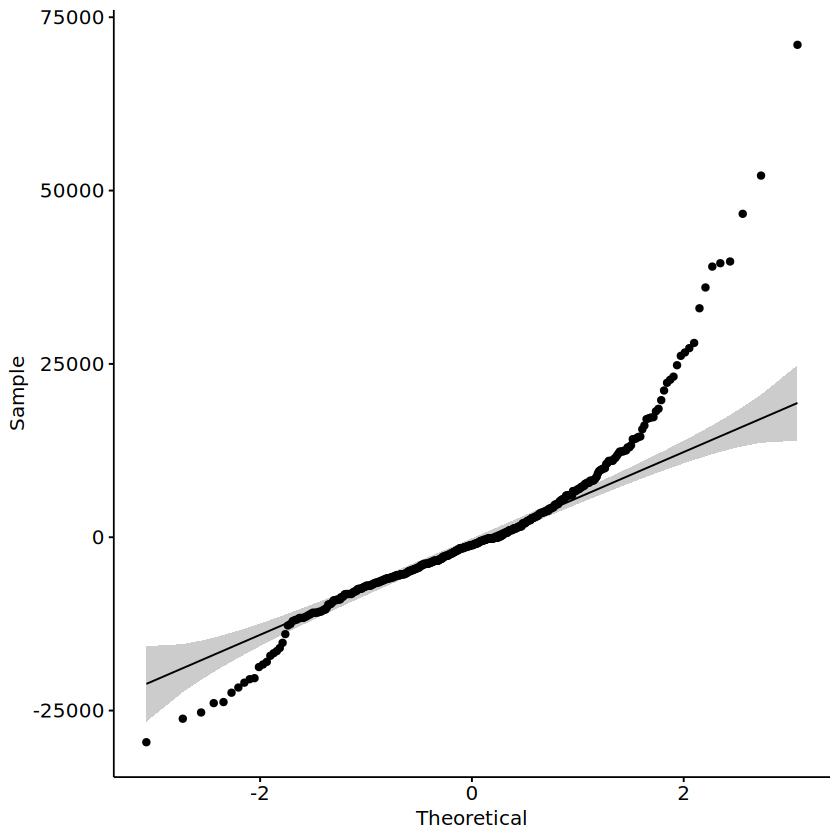

In [25]:
residuos.anova = Residuos (data = datos, v.depend, v.factor)
ggqqplot(residuos.anova)

In [26]:
test_homoc_levene = levene_test(formula.anova, data = datos)
test_homoc_levene

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,471,51.18872,7.649994e-21


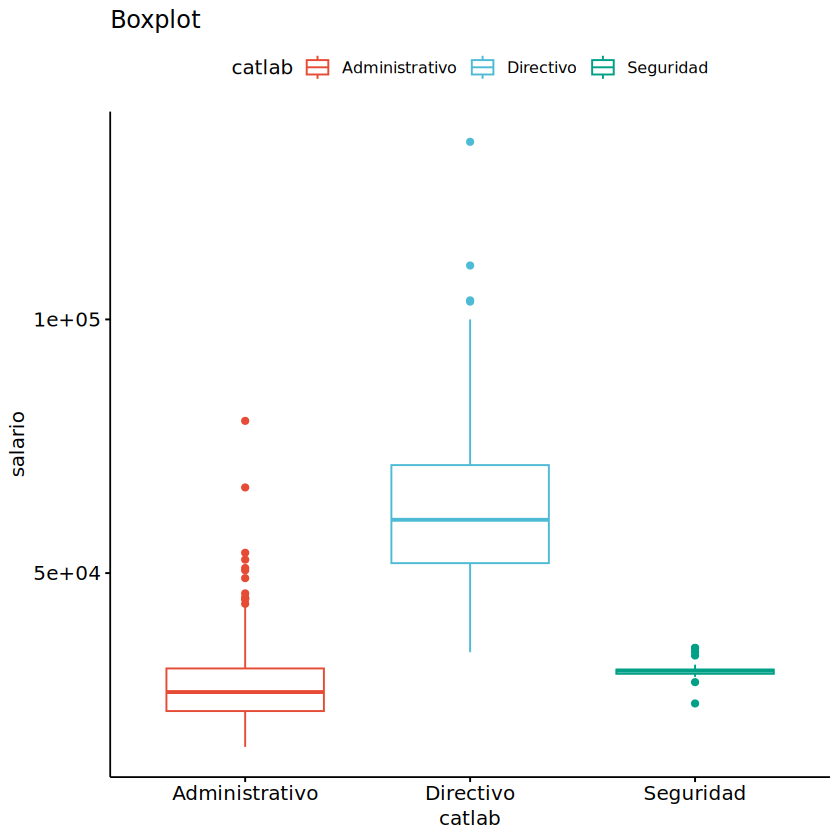

In [27]:
GraficoCajas(datos, v.depend, v.factor, "Boxplot")

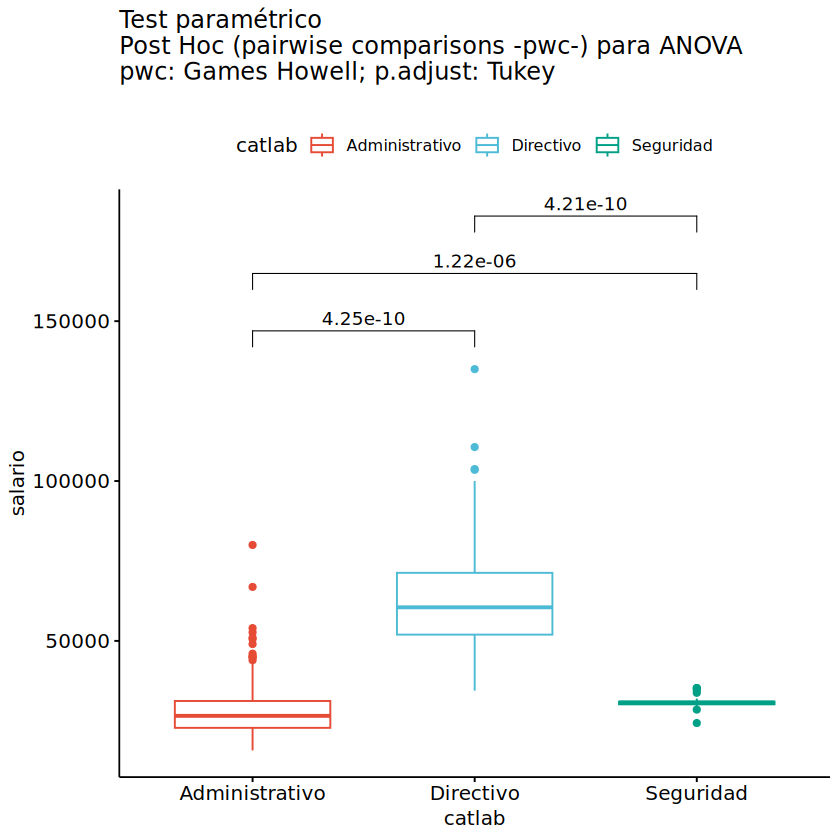

In [28]:
post_games_howell <- games_howell_test(datos, formula.anova)
GraficoCajasPost(datos, v.depend, v.factor,
                 es_param = TRUE , es_mr = FALSE, post_games_howell)

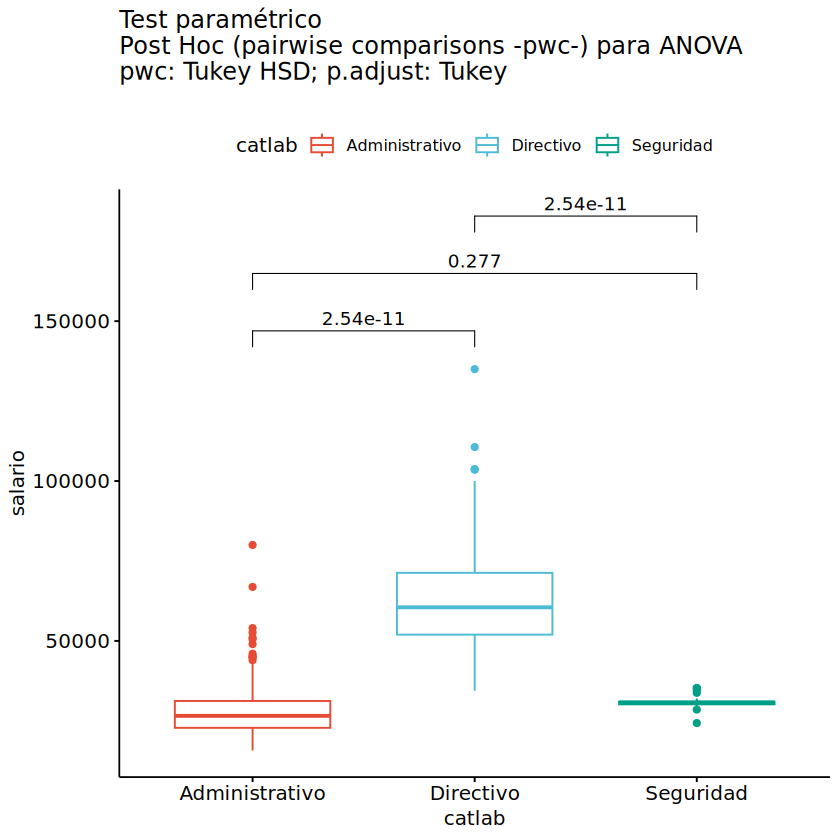

In [29]:
post_tukey <- tukey_hsd(datos, formula.anova)
GraficoCajasPost(datos, v.depend, v.factor,
                 es_param = TRUE , es_mr = FALSE, post_tukey)

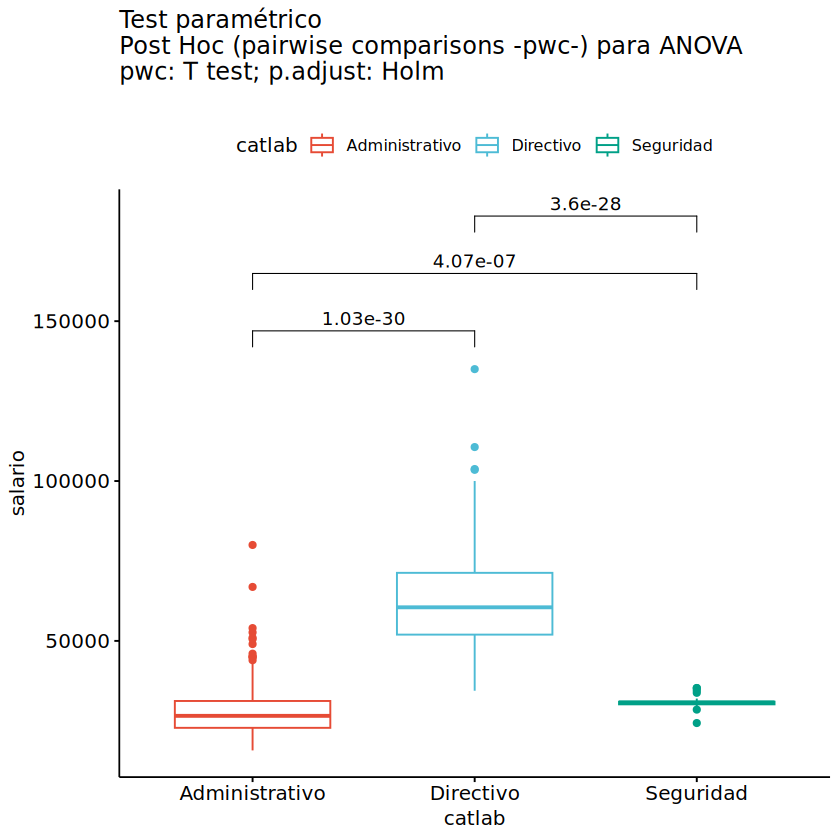

In [30]:
post_pw_t_test <- pairwise_t_test (formula.anova, data = datos,
                                   pool.sd = FALSE)
GraficoCajasPost(datos, v.depend, v.factor ,
                 es_param = TRUE , es_mr = FALSE, post_pw_t_test)

In [31]:
post_pw_t_test_JAMOVI <- pairwise_t_test (formula.anova, data = datos,
                                   pool.sd = TRUE)
post_pw_t_test_JAMOVI

,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,salario,Administrativo,Directivo,363,84,9.61e-109,****,2.88e-108,****
2,salario,Administrativo,Seguridad,363,27,1.26e-01,ns,1.26e-01,ns
3,salario,Directivo,Seguridad,84,27,1.27e-40,****,2.54e-40,****


### 2.1.4 Anova para k muestras independientes (test no paramétrico)

#### 2.1.4.1 Test conjunto (omnibus)

Recordemos que al no cumplirse la hipótesis de normalidad de los residuos, es conveniente aplicar un test no paramétrico. Para ejecutar el test de Kruskal-Wallis llamamos a la función de en la forma habitual con la fórmula y los datos. Llamamos también a la función . Nos debe salir lo siguiente:

Recordemos que el test de Kruskal-Wallis es un test de dominancia estocástica. Si los grupos hubiesen presentado distribuciones similares, también sería un test sobre las medianas. Sin embargo, hemos visto que las varianzas son distintas en cada grupo por lo que no tienen distribuciones similares.

En cualquier caso, si queremos ver las distribuciones de cada grupo, podemos usar la función de la siguiente forma:

#### 2.1.4.2 Post hoc

**Post hoc específico**

proporciona el test específico de Dunn en vez del test de Dwass-Steel-Critchlow-Fligner que veíamos con Jamovi. Se ejecuta en la forma habitual:

Un test específico aún mejor que el de Dunn es el test de Conover incluido en el paquete a través de la función . En este test, hay que especificar el tipo de penalización a realizar. Usamos la de Holm :

Podemos apreciar que el test de Conover es capaz de rechazar la igualdad entre Administrativos y Seguridad con más fuerza que el de Dunn.

**Nota**: Si desea lanzar manualmente el test de Dwass-Steel-Critchlow-Fligner , puede recurrir a la función en el paquete . También puede ejecutar el test de Nemenyi a través de la función del mismo paquete.

**Nota**: El paquete contiene muchos tests para realizar el post hoc no paramétrico. Sin embargo, los tests no son compatibles con , por lo que no podremos mostrar los resultados con la función .

**Post hoc genérico**

Para ejecutar las comparaciones múltiples usando un test genérico con una penalización del nivel de significación usamos la misma función que usábamos para ejecutar el test de Mann-Whitney en el caso no paramétrico de 2 muestras independientes. Si la variable factor de la fórmula pasada como parámetro contiene más de un grupo, automáticamente se realizan las comparaciones múltiples:

Concluimos por tanto que hay diferencias significativas en los tres grupos. Formalmente, para poder concluir cuál es mayor que la otra, deberíamos haber aplicado tests a una cola (one-sided test)

Para ello habría que seleccionar la opción en la función . En cualquier caso, es claro que los directivos dominan de forma estocástica sobre los otros dos grupos. No está tan claro en el caso de los de Seguridad y Administrativos, por lo que si quisiéramos inferir conclusiones con garantía estadística, habría que lanzar los tests a una cola (si lo hace comprobará que, efectivamente, el salario del grupo de seguridad es mayor -según el criterio de dominancia estocástica- que los administrativos)

**Post hoc con control**

Si queremos fijar un grupo de control , podemos usar el test específico de Conover (usando la función de ) o bien el test genérico de Wilcoxon usando la función anterior y el parámetro .

In [25]:
# COMPLETAR

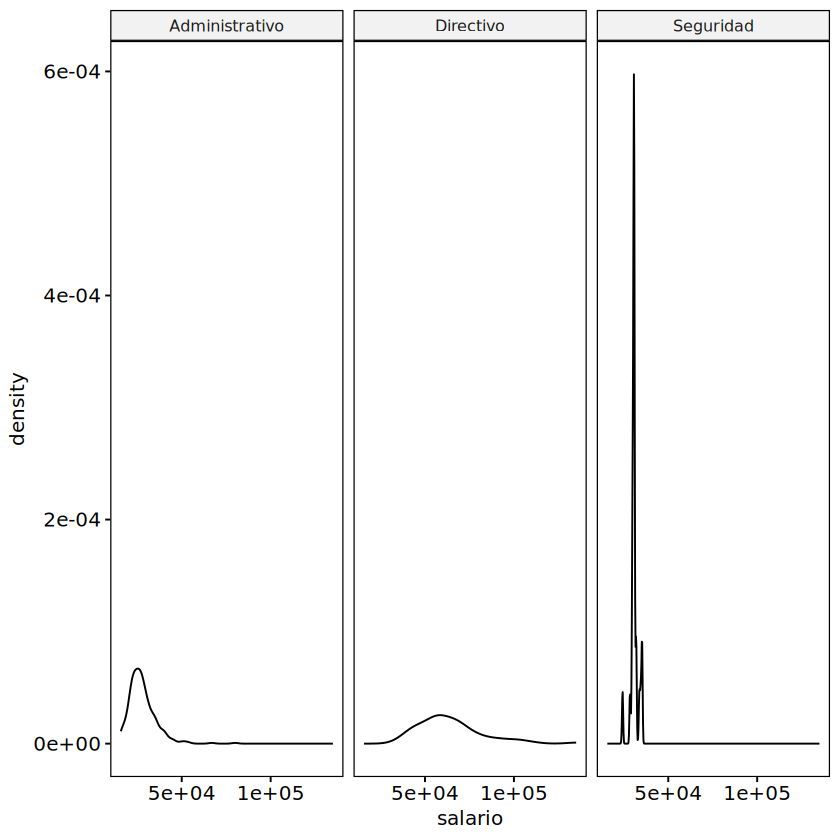

In [32]:
ggdensity(as.data.frame(datos), v.depend, facet.by = v.factor)

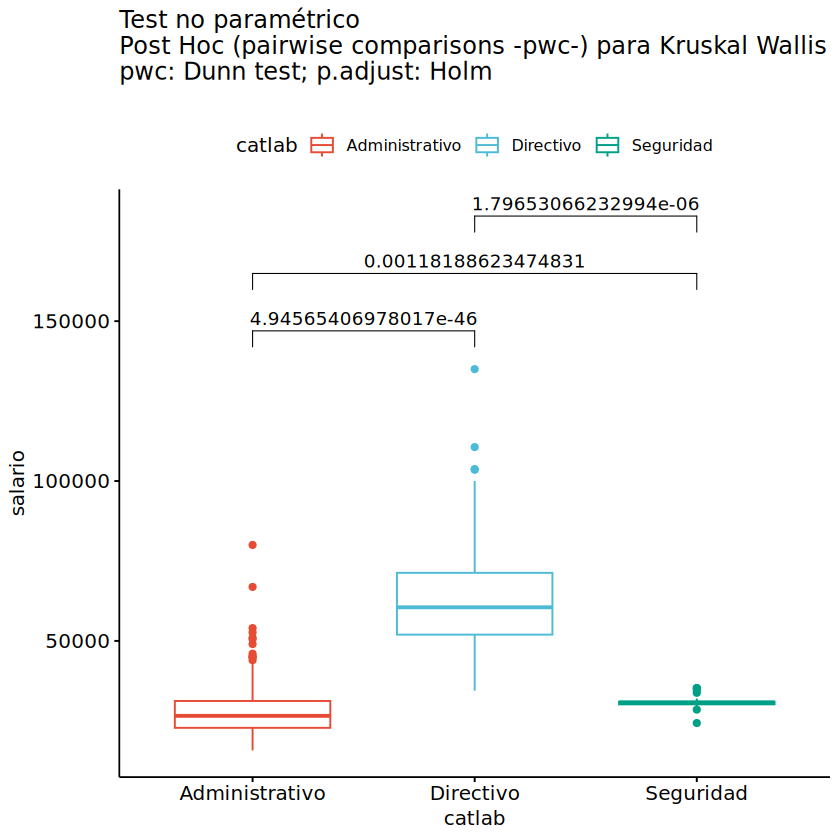

In [33]:
post_kw_dunn = dunn_test(formula.anova, data = datos)
GraficoCajasPost(datos, v.depend, v.factor,
                 es_param = FALSE , es_mr = FALSE, post_kw_dunn)

In [34]:
post_kw_conover = kwAllPairsConoverTest(formula.anova, data = datos,
                                        p.adjust.method = "holm")
post_kw_conover

Warning message in kwAllPairsConoverTest.default(c(57000L, 40200L, 21450L, 21900L, :
“Ties are present. Quantiles were corrected for ties.”

	Pairwise comparisons using Conover's all-pairs test


data: salario by catlab



P value adjustment method: holm



          Administrativo Directivo
Directivo < 2e-16        -        
Seguridad 1.9e-05        3.1e-10  

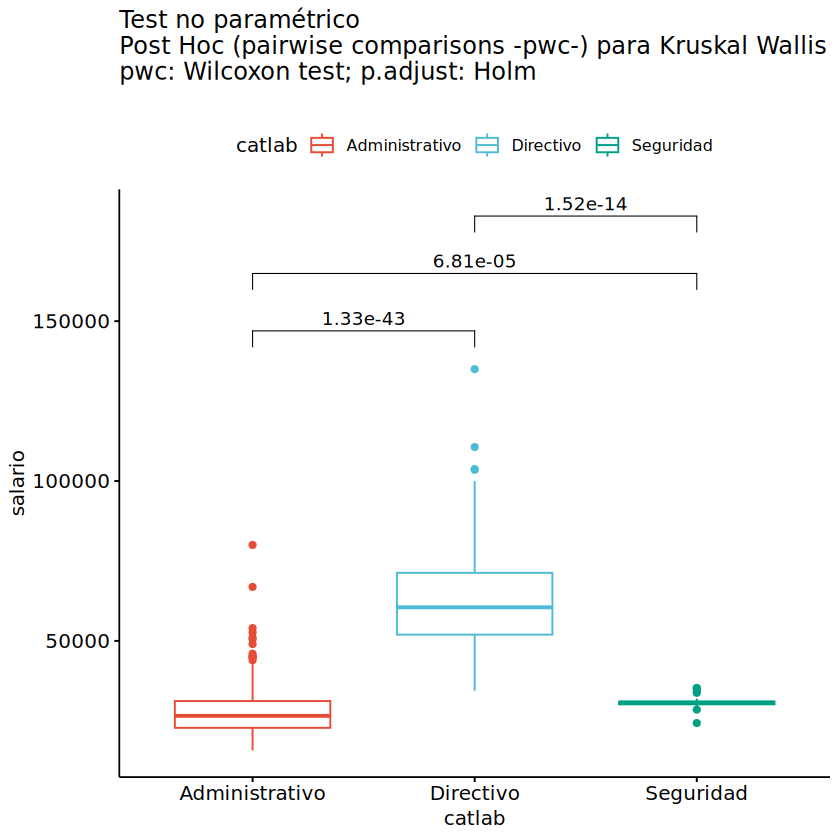

In [35]:
post_kw_wilc = rstatix::wilcox_test(formula.anova, data = datos)
GraficoCajasPost(datos, v.depend, v.factor,
                 es_param = FALSE, es_mr = FALSE, post_kw_wilc)